In [28]:
%matplotlib inline

In [29]:
import numpy as np
# Seeding random to have more realistic results
np.random.seed(123132)

In [30]:
sampleCount = 1000
mu1 = np.array([10, 10])
mu2 = np.array([22, 10])
sigma = np.array([[4, 4], [4, 9]])

firstSample = np.random.multivariate_normal(mu1, sigma, sampleCount)
secondSample = np.random.multivariate_normal(mu2, sigma, sampleCount)

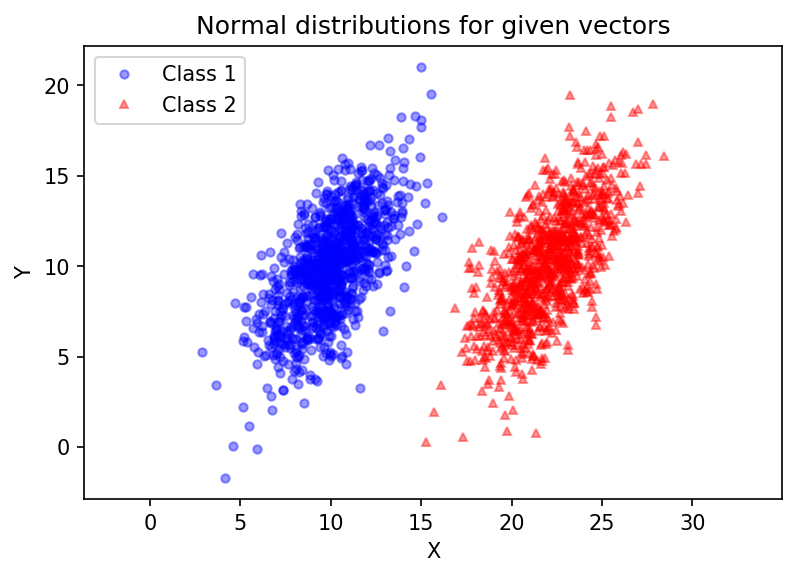

In [31]:
from matplotlib import pyplot as plt
plt.rcParams['figure.dpi']= 150

plt.plot(firstSample[:,0], firstSample[:,1], 'o', markersize=4, color='blue', alpha=0.4, label='Class 1')
plt.plot(secondSample[:,0], secondSample[:,1], '^', markersize=4, color='red', alpha=0.4, label='Class 2')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')
plt.legend()
plt.title('Normal distributions for given vectors')

plt.show()

In [32]:
from sklearn.decomposition import PCA

def computePCA(dataset, components=2):
    pca = PCA(components)
    pca.fit(dataset)
    return pca

firstPca = computePCA(firstSample)
secondPca = computePCA(secondSample)
print(secondPca.components_)

[[-0.48325439 -0.87547998]
 [-0.87547998  0.48325439]]


In [33]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

def drawPCA(pca):
    for length, vector in zip(pca.explained_variance_, pca.components_):
        v = vector * 3 * np.sqrt(length)
        draw_vector(pca.mean_, pca.mean_ + v)

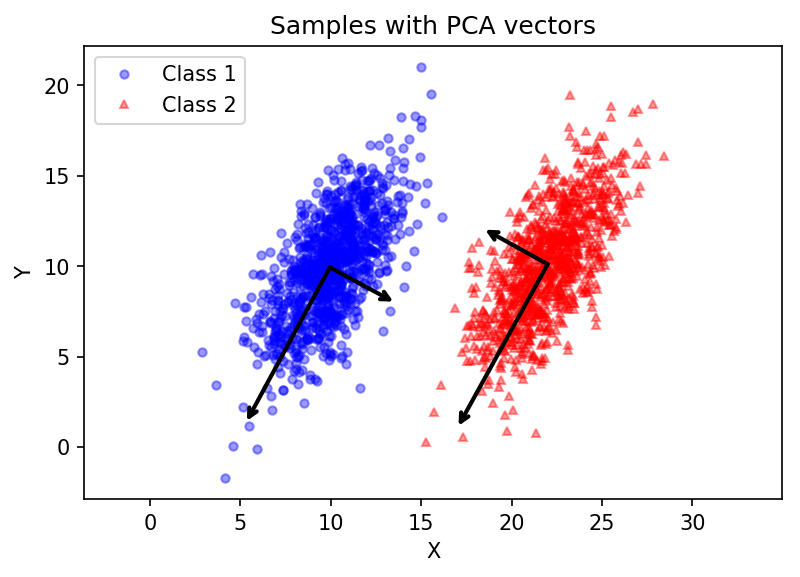

In [34]:
plt.plot(firstSample[:,0], firstSample[:,1], 'o', markersize=4, color='blue', alpha=0.4, label='Class 1')
plt.plot(secondSample[:,0], secondSample[:,1], '^', markersize=4, color='red', alpha=0.4, label='Class 2')

drawPCA(firstPca)
drawPCA(secondPca)

plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')
plt.legend()
plt.title('Samples with PCA vectors')
plt.show()

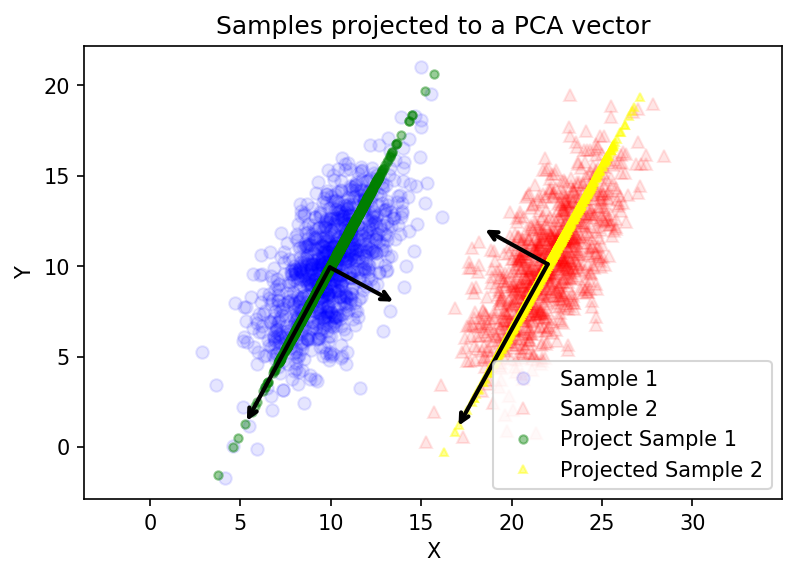

In [35]:
firstLinePca = computePCA(firstSample, 1)
secondLinePca = computePCA(secondSample, 1)

firstProjectedLine = firstLinePca.inverse_transform(firstLinePca.transform(firstSample))
secondProjectedLine = secondLinePca.inverse_transform(secondLinePca.transform(secondSample))

plt.plot(firstSample[:, 0], firstSample[:, 1], 'o', color='blue', alpha=0.1, label='Sample 1')
plt.plot(secondSample[:, 0], secondSample[:, 1], '^', color='red', alpha=0.1, label='Sample 2')
plt.plot(firstProjectedLine[:,0], firstProjectedLine[:,1], 'o', markersize=4, color='green', alpha=0.4, label='Project Sample 1')
plt.plot(secondProjectedLine[:,0], secondProjectedLine[:,1], '^', markersize=4, color='yellow', alpha=0.4, label='Projected Sample 2')

drawPCA(firstPca)
drawPCA(secondPca)

plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')
plt.legend()
plt.title('Samples projected to a PCA vector')
plt.show()

In [36]:
firstTransformed = firstPca.transform(firstSample)
secondTransformed = secondPca.transform(secondSample)

firstReconstructed = firstPca.inverse_transform(firstTransformed)
secondReconstructed = secondPca.inverse_transform(secondTransformed)

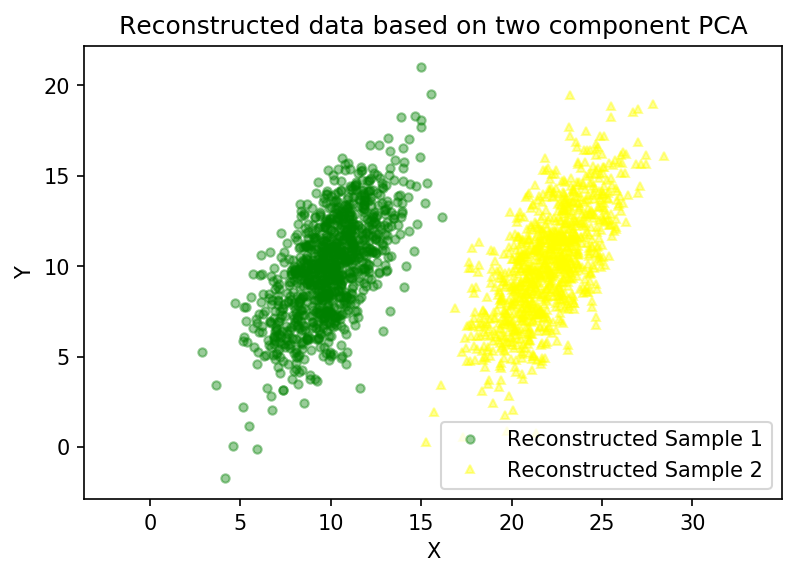

In [37]:
from matplotlib import pyplot as plt
plt.rcParams['figure.dpi']= 150

plt.plot(firstReconstructed[:,0], firstReconstructed[:,1], 'o', markersize=4, color='green', alpha=0.4, label='Reconstructed Sample 1')
plt.plot(secondReconstructed[:,0], secondReconstructed[:,1], '^', markersize=4, color='yellow', alpha=0.4, label='Reconstructed Sample 2')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')
plt.legend()
plt.title('Reconstructed data based on two component PCA')

plt.show()

In [38]:
firstLoss = ((firstSample - firstReconstructed) ** 2).mean()
secondLoss = ((secondSample - secondReconstructed) ** 2).mean()
print("First reconstruction error -> " + str(firstLoss))
print("Second reconstruction error -> " + str(secondLoss))

First reconstruction error -> 6.705317694378601e-32
Second reconstruction error -> 3.3289930200326697e-31
